In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcard-fraud-detection/creditcard.csv


In [2]:
df = pd.read_csv('/kaggle/input/creditcard-fraud-detection/creditcard.csv')

In [3]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
112610,72725.0,-3.048164,2.152980,1.138643,0.597742,-1.264251,-0.369244,0.014636,-0.243249,1.193861,...,0.457391,0.840558,-0.008559,0.976542,0.099130,-0.502185,-2.303547,0.249921,30.13,0
191113,129118.0,-0.671633,-0.863743,-0.817516,-4.384542,0.779891,-1.819810,0.923591,-0.313369,0.335572,...,-0.068533,0.178573,0.155747,0.560628,-0.060437,-1.037786,0.412462,0.290372,94.98,0
68624,53069.0,1.259999,0.273125,0.034910,0.417864,0.009171,-0.357316,-0.038469,-0.005541,-0.160566,...,-0.282083,-0.855232,0.032608,-0.400723,0.273107,0.119959,-0.028809,0.013547,2.69,0
156246,107637.0,1.984591,-0.184305,-0.153722,0.558171,-0.679554,-0.807009,-0.544798,-0.171060,2.655942,...,-0.267096,-0.415068,0.363027,-0.082181,-0.405155,-0.965107,0.029077,-0.032452,9.39,0
93131,64264.0,0.793066,-0.686883,-0.490161,0.187095,-0.439466,-1.013930,0.623032,-0.278611,-0.339966,...,0.148569,-0.186996,-0.312171,0.419840,0.406936,1.028070,-0.169216,0.023286,259.00,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
df.shape

(284807, 31)

In [6]:
df[['Time','Amount','Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df['Class'].tail(23)

284784    0
284785    0
284786    0
284787    0
284788    0
284789    0
284790    0
284791    0
284792    0
284793    0
284794    0
284795    0
284796    0
284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

# Percentage of total no fraud transaction

In [9]:
nfcount = 0;
notFraud = df['Class']
for i in range(len(notFraud)):
    if(notFraud[i] == 0):
        nfcount = nfcount+1;
print(nfcount)
per_nf = (nfcount/len(notFraud))*100
print('percentage of total non fraud transactions=',per_nf)

284315
percentage of total non fraud transactions= 99.82725143693798


# Percentage of total fraud transaction

In [10]:
fcount = 0;
Fraud = df['Class']
for i in range(len(Fraud)):
    if(Fraud[i] == 1):
        fcount = fcount+1;
print(fcount)
per_f = (fcount/len(Fraud))*100
print('percentage of total fraud transactions=',per_f)

492
percentage of total fraud transactions= 0.1727485630620034


In [11]:
plot_data = pd.DataFrame()
plot_data['Fraud Transaction'] = Fraud
plot_data['Genuine Transaction'] = notFraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


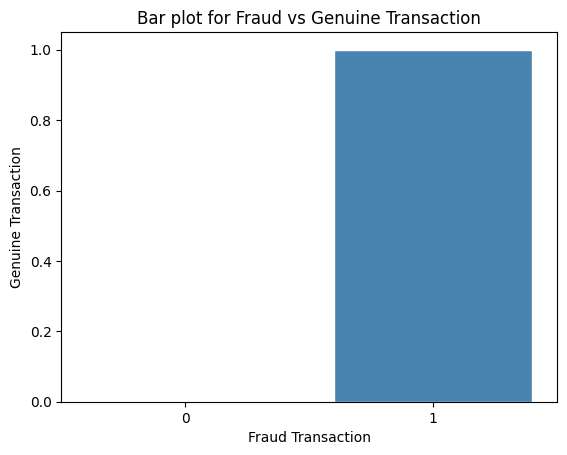

In [12]:
plt.title("Bar plot for Fraud vs Genuine Transaction")
sns.barplot(x= 'Fraud Transaction', y= 'Genuine Transaction',data = plot_data, palette='Blues',edgecolor ='w')
plt.show()

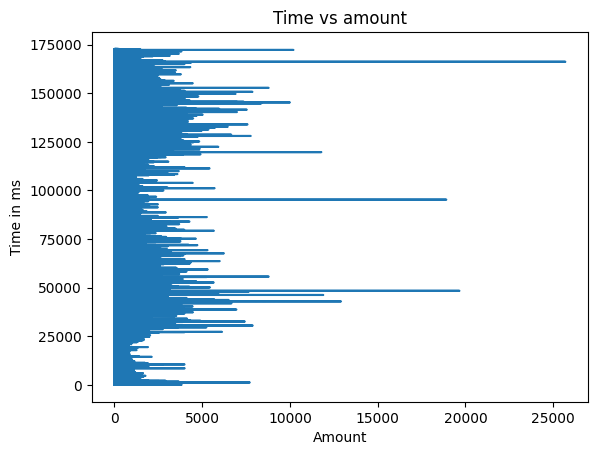

In [13]:
x = df['Amount']
y = df['Time']
plt.plot(x,y)
plt.title("Time vs amount")
plt.xlabel('Amount')
plt.ylabel('Time in ms')
plt.show()

# Outliers

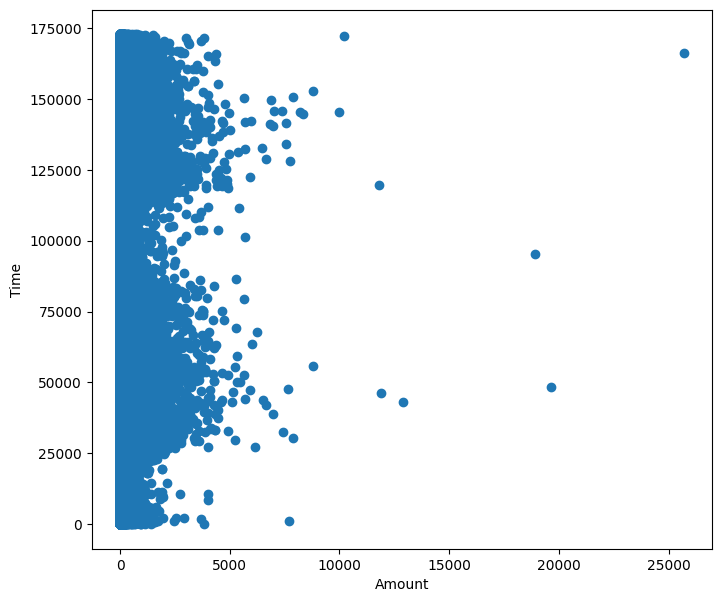

In [14]:
fig , ax =plt.subplots(figsize=(8,7))
ax.scatter(df['Amount'],df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

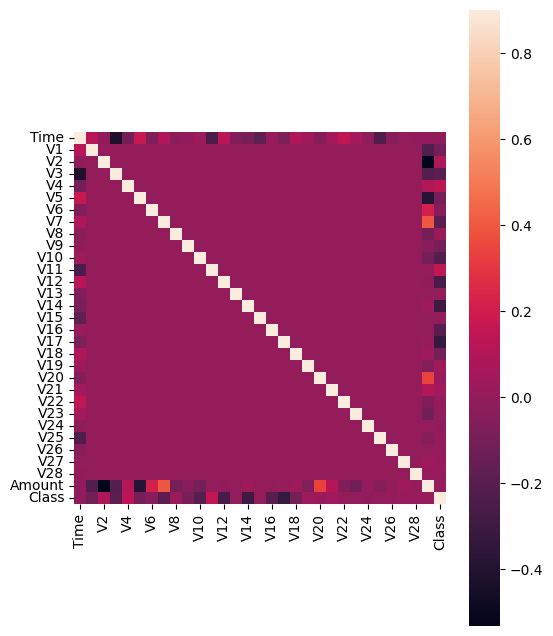

In [15]:
# correlation matrix
matrix = df.corr()
fig = plt.figure(figsize=(6,8))
sns.heatmap(matrix, vmax = .9, square =True)
plt.show()

In [16]:
x = df.drop(['Class'],axis=1)
y = df['Class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred = logistic.predict(x_test)
accuracy = logistic.accuracy_score(y_test,y_pred)

In [19]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [20]:
print("Accuracy score is:", accuracy * 100)

Accuracy score is: 99.89817773252344
